In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/Daily_Public_Transport_Passenger_Boardings_By_Ticket_Type_20240513.csv')

In [ ]:
data.head()

,Date,MyWay,Paper Ticket
0,01/07/2019,66215,4325
1,15/09/2023,63800,7349
2,28/12/2021,9994,1882
3,11/01/2023,43769,3991
4,11/09/2021,3810,685


In [ ]:
data.tail()

,Date,MyWay,Paper Ticket
1773,19/01/2023,46083,4622
1774,16/08/2023,70115,6955
1775,10/01/2022,21932,2315
1776,04/05/2020,14842,854
1777,26/07/2023,69067,6811


In [ ]:
data.info

<bound method DataFrame.info of             Date  MyWay  Paper Ticket
0     01/07/2019  66215          4325
1     15/09/2023  63800          7349
2     28/12/2021   9994          1882
3     11/01/2023  43769          3991
4     11/09/2021   3810           685
...          ...    ...           ...
1773  19/01/2023  46083          4622
1774  16/08/2023  70115          6955
1775  10/01/2022  21932          2315
1776  04/05/2020  14842           854
1777  26/07/2023  69067          6811

[1778 rows x 3 columns]>

In [ ]:
data.describe()

,MyWay,Paper Ticket
count,1778.000000,1778.000000
mean,40985.889201,3744.153543
std,23275.162569,2153.562760
min,0.000000,13.000000
25%,17207.750000,1991.500000
50%,45079.500000,3374.500000
75%,60946.500000,5383.000000
max,88313.000000,10310.000000


In [ ]:
data.isnull().sum()

Date            0
MyWay           0
Paper Ticket    0
dtype: int64

In [ ]:
data.shape

(1778, 3)

In [ ]:
data.columns

Index(['Date', 'MyWay', 'Paper Ticket'], dtype='object')

In [ ]:
df=data['Date'].value_counts()

In [ ]:
df

Date
01/07/2019    1
01/04/2023    1
09/11/2022    1
08/04/2021    1
15/03/2021    1
             ..
11/10/2022    1
08/11/2023    1
02/05/2022    1
07/10/2021    1
26/07/2023    1
Name: count, Length: 1778, dtype: int64

In [ ]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

In [76]:
filtered_data = data.loc[(data['Date'] >= '01-04-2023') & (data['Date'] <= '30-04-2024')]
filtered_data

,Date,MyWay,Paper Ticket,month,year
1,2023-09-15,63800,7349,9,2023
3,2023-01-11,43769,3991,1,2023
6,2023-03-01,72902,6614,3,2023
8,2023-03-07,73376,6872,3,2023
10,2023-08-29,69155,6507,8,2023
...,...,...,...,...,...
1768,2023-07-13,49311,4309,7,2023
1770,2024-04-14,18001,2844,4,2024
1773,2023-01-19,46083,4622,1,2023
1774,2023-08-16,70115,6955,8,2023


In [77]:
filtered_data.value_counts()

Date        MyWay  Paper Ticket  month  year
2023-01-04  32811  3739          1      2023    1
2024-01-01  9565   2012          1      2024    1
2023-11-30  62862  8650          11     2023    1
2023-11-29  53348  7224          11     2023    1
2023-11-28  60432  8535          11     2023    1
                                               ..
2023-06-09  60710  7198          6      2023    1
2023-06-08  58620  6420          6      2023    1
2023-06-07  64497  6883          6      2023    1
2023-06-06  63528  6923          6      2023    1
2024-04-30  74119  9885          4      2024    1
Name: count, Length: 483, dtype: int64

In [78]:
filtered_data.shape

(483, 5)

<Figure size 1000x600 with 0 Axes>

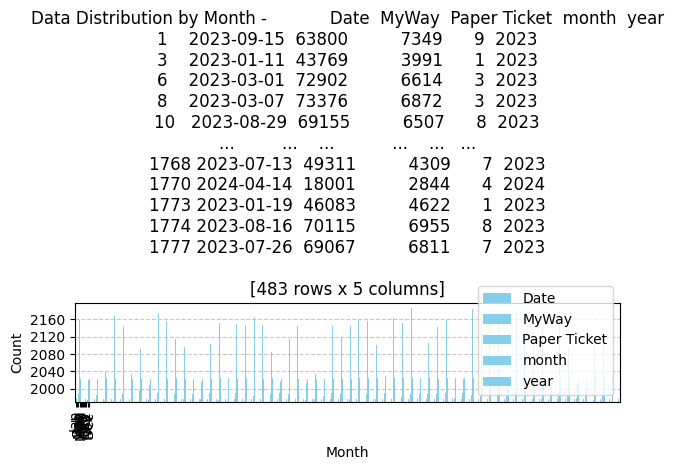

In [79]:
plt.figure(figsize=(10, 6))
filtered_data.plot(kind='bar', color='skyblue')
plt.title(f'Data Distribution by Month - {filtered_data}')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

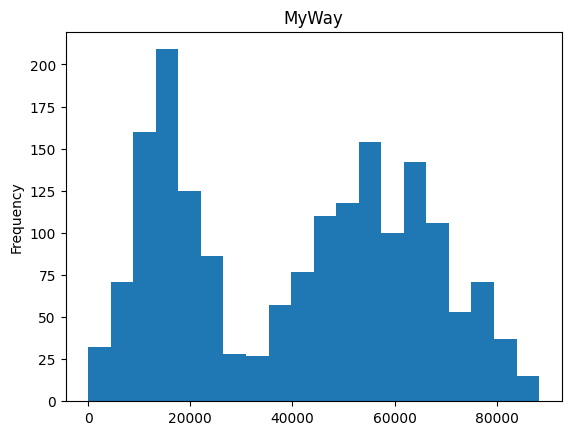

In [80]:
data['MyWay'].plot(kind='hist', bins=20, title='MyWay')
plt.show()

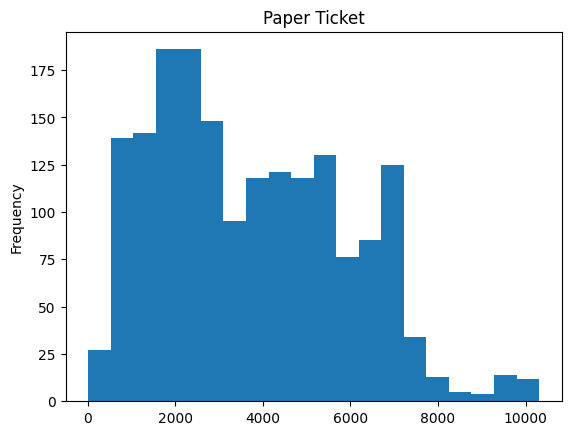

In [81]:
data['Paper Ticket'].plot(kind='hist', bins=20, title='Paper Ticket')
plt.show()

In [82]:
data['month'] = data['Date'].dt.month
data['year'] = data['Date'].dt.year

<ipython-input-83-2a0137c6c25f>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=data.month, y=data['MyWay'],ci=None)


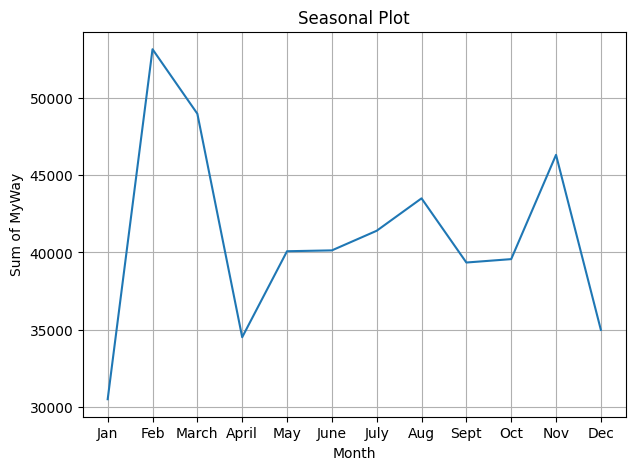

In [83]:
plt.figure(figsize=(7, 5))
sns.lineplot(x=data.month, y=data['MyWay'],ci=None)
plt.xlabel('Month')
plt.ylabel('Sum of MyWay')
plt.title('Seasonal Plot')
plt.xticks(range(1, 13), labels=[
           'Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

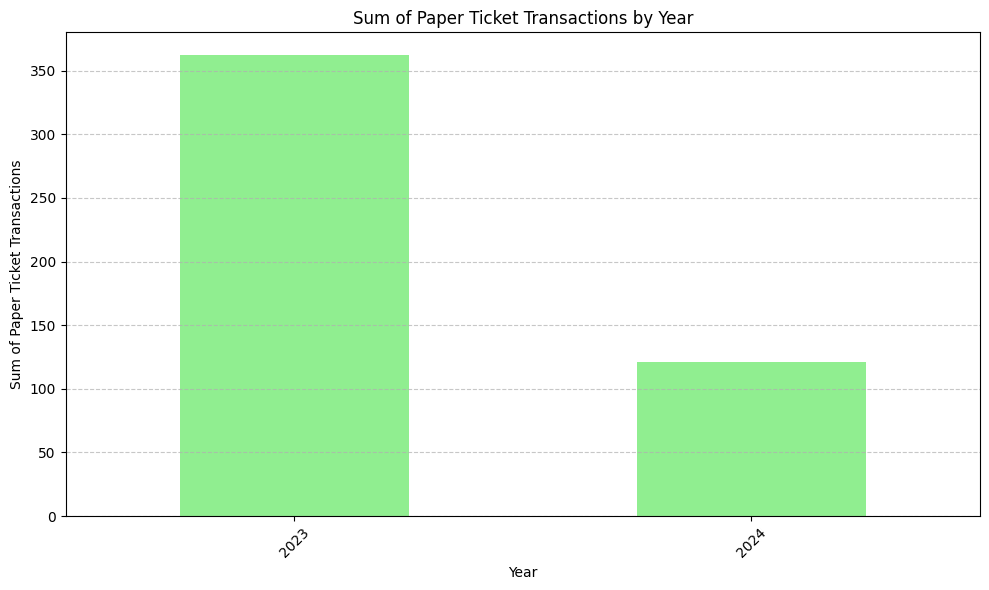

In [87]:
paper_ticket_vis = filtered_data.groupby('year').size()
plt.figure(figsize=(10, 6))
paper_ticket_vis.plot(kind='bar', color='lightgreen')

plt.title('Sum of Paper Ticket Transactions by Year')
plt.xlabel('Year')
plt.ylabel('Sum of Paper Ticket Transactions')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

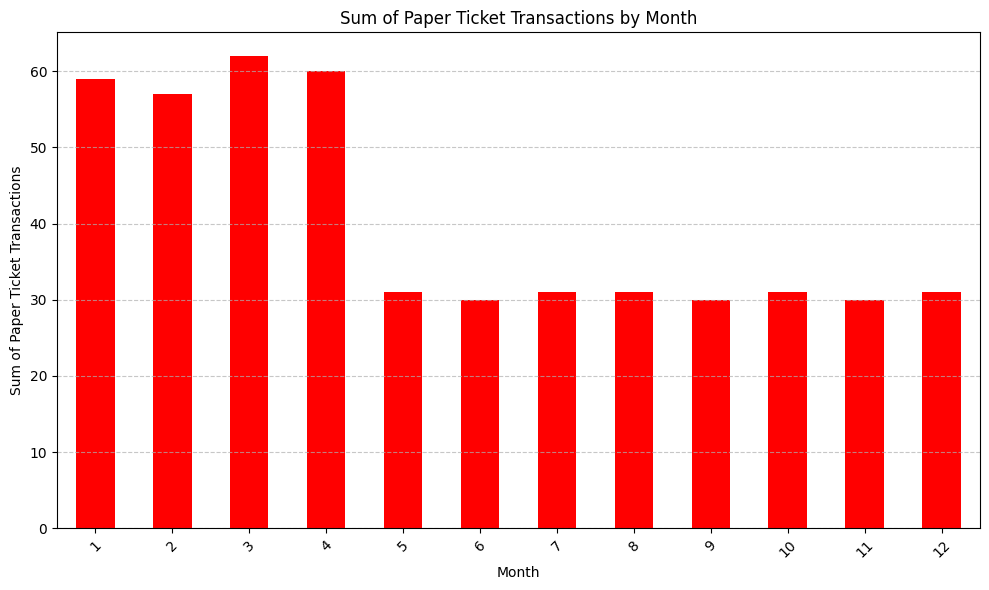

In [90]:
paper_ticket_vis = filtered_data.groupby('month').size()
plt.figure(figsize=(10, 6))
paper_ticket_vis.plot(kind='bar', color='red')

plt.title('Sum of Paper Ticket Transactions by Month')
plt.xlabel('Month')
plt.ylabel('Sum of Paper Ticket Transactions')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [97]:
f_data=filtered_data['MyWay']

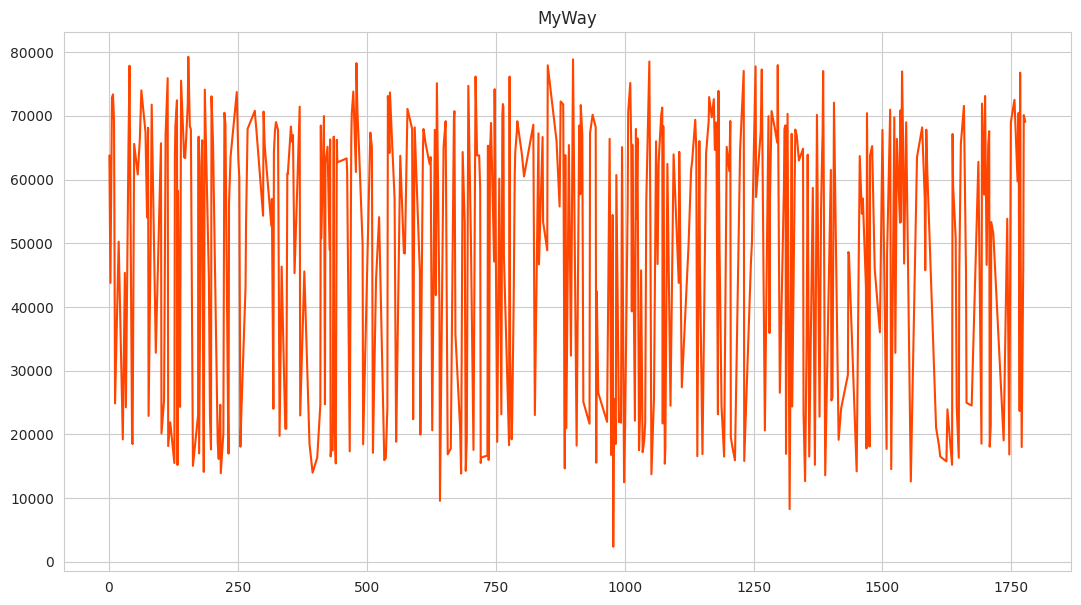

In [99]:
sns.set_style('whitegrid')
f_data.plot(figsize = (13,7), title ='MyWay', color = 'orangered')
plt.show()

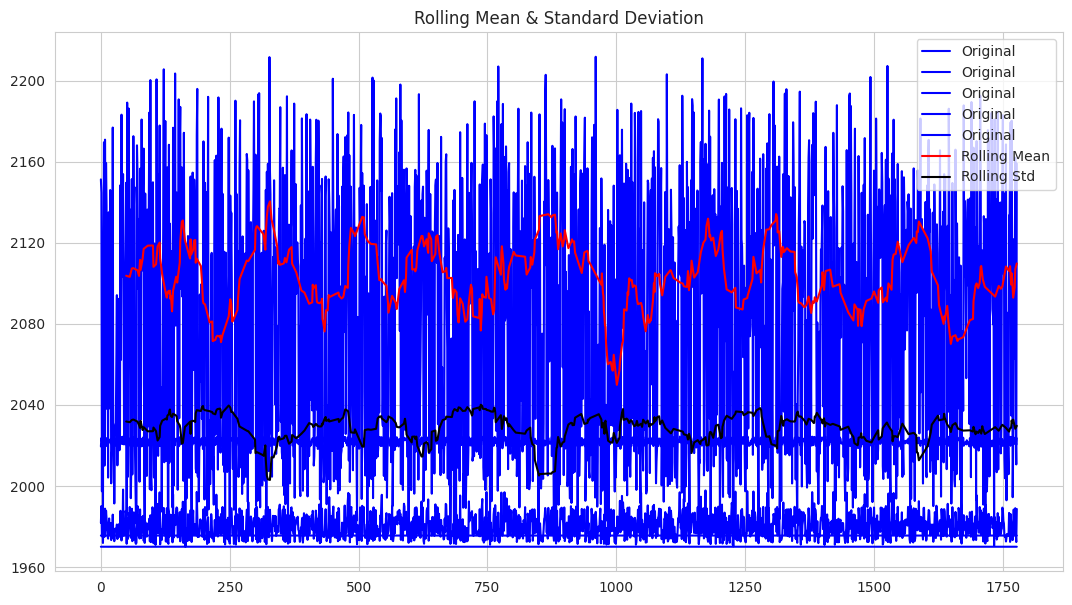

In [114]:
rolmean = f_data.rolling(window=15).mean()
rolstd = f_data.rolling(window=15).std()

plt.figure(figsize = (13,7))
orig = plt.plot(data, color = 'blue', label = 'Original')
mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
std = plt.plot(rolstd, color = 'black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=True)

In [103]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test:')
dftest = adfuller(data['MyWay'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Resilts of Dickey-Fuller Test:
Test Statistic                -1.457146e+01
p-value                        4.621214e-27
Lags Used                      1.000000e+01
Number of Observations Used    1.767000e+03
Critical Value (1%)           -3.434056e+00
Critical Value (5%)           -2.863177e+00
Critical Value (10%)          -2.567642e+00
dtype: float64


In [113]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(f_data, order=(5,1,0))
fit_model = model.fit()
forecast = fit_model.forecast(steps=7)
print("Forecast for the next 7 days is :")
print(forecast)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Forecast for the next 7 days is :
483    54229.123231
484    49931.008815
485    52322.003222
486    57668.644877
487    58750.169118
488    56576.759411
489    54795.469357
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
